In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

img_height, img_width = 50, 50
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
  'drive/MyDrive/samecatanddog/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  'drive/MyDrive/samecatanddog/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 202 files belonging to 2 classes.
Using 162 files for training.
Found 202 files belonging to 2 classes.
Using 40 files for validation.


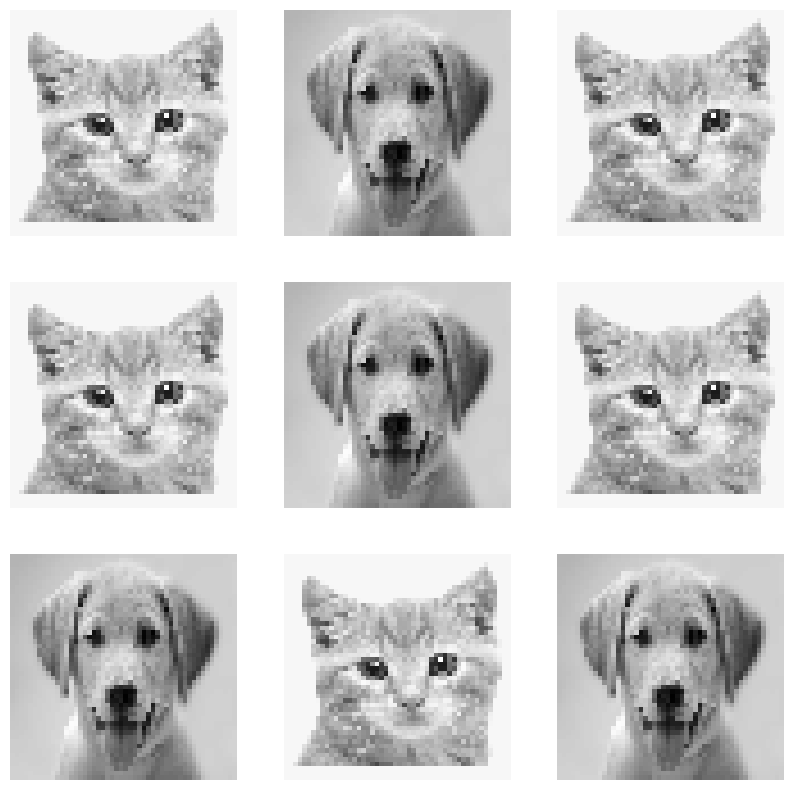

In [ ]:


plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")


In [ ]:
num_classes = len(train_ds.class_names)

model = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)


Epoch 1/10
6/6 [==============================] - 4s 359ms/step - loss: 0.6756 - accuracy: 0.5802 - val_loss: 0.4823 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 4s 324ms/step - loss: 0.3785 - accuracy: 0.9074 - val_loss: 0.2692 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 3s 170ms/step - loss: 0.2035 - accuracy: 1.0000 - val_loss: 0.0961 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 2s 114ms/step - loss: 0.0713 - accuracy: 1.0000 - val_loss: 0.0319 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 2s 110ms/step - loss: 0.0226 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 3s 195ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 3s 192ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 8/10
6/6 [====

Layer 0 output shape: (1, 50, 50, 3)


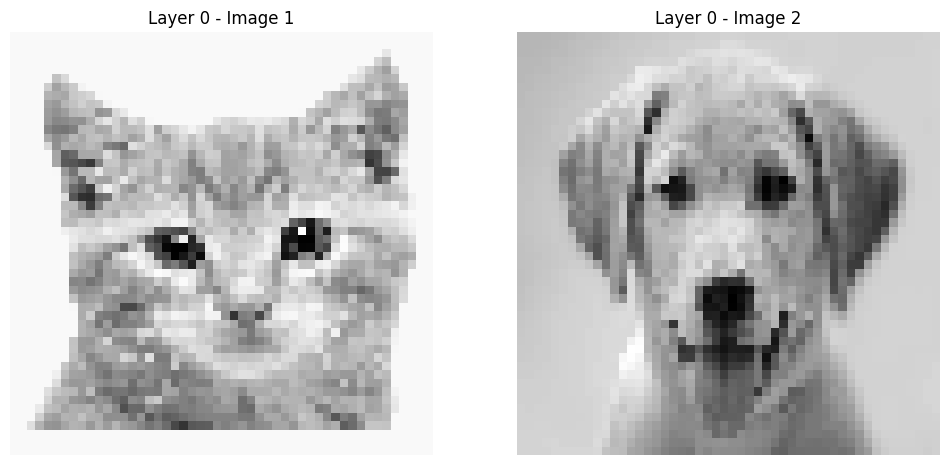

Layer 1 output shape: (1, 48, 48, 16)


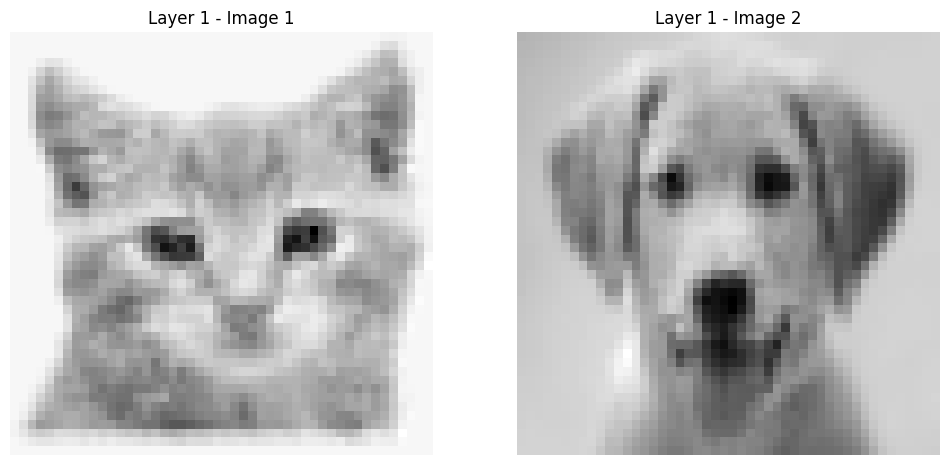

Layer 2 output shape: (1, 24, 24, 16)


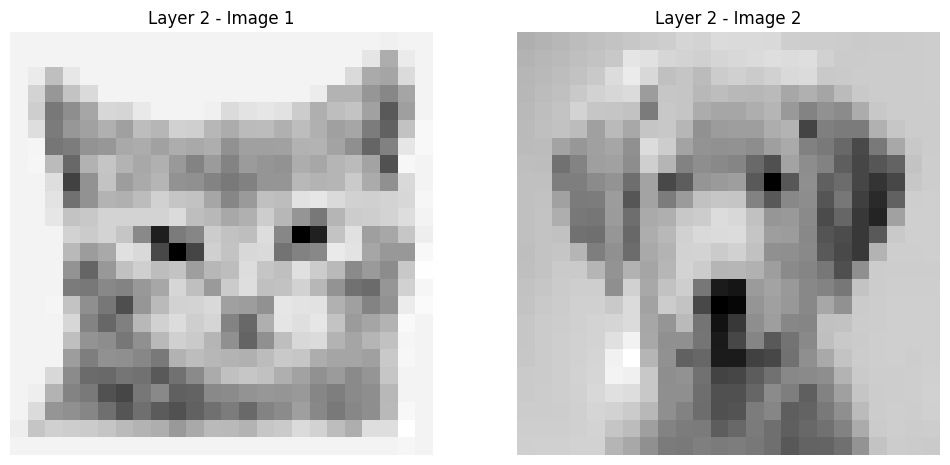

Layer 3 output shape: (1, 22, 22, 8)


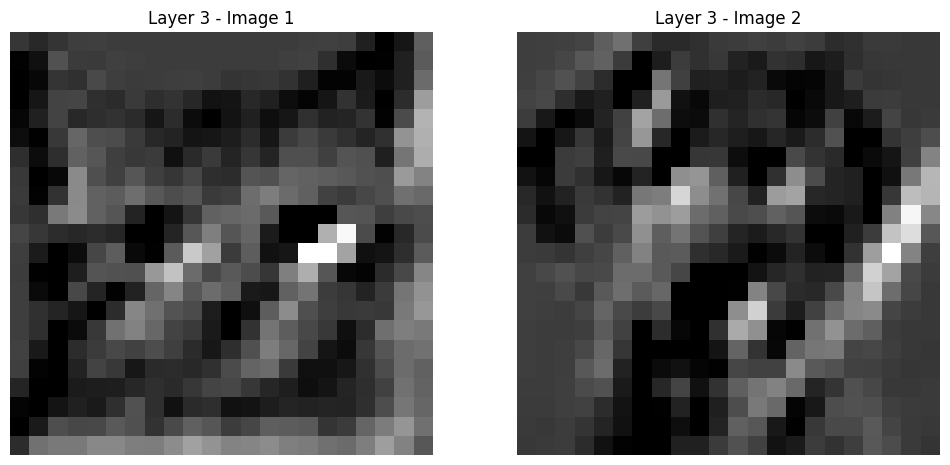

Layer 4 output shape: (1, 11, 11, 8)


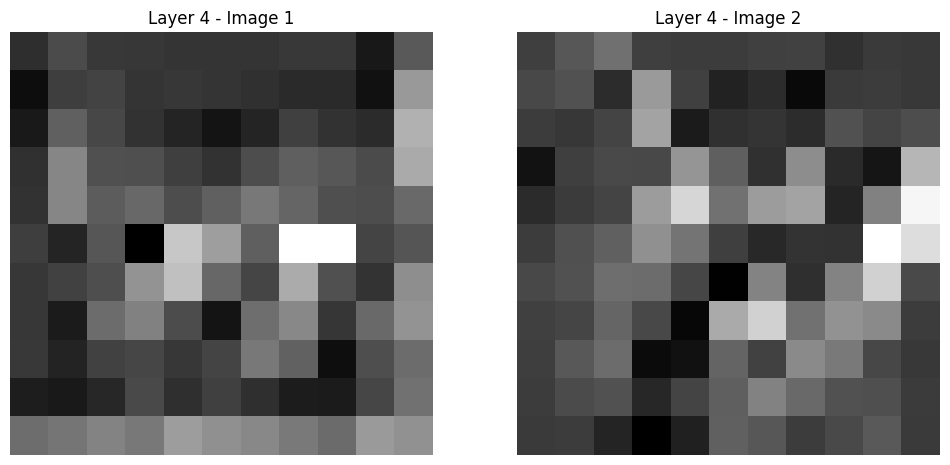

Layer 5 output shape: (1, 968)
Skipping layer 5 for visualization due to incompatible shape.


In [ ]:
import matplotlib.pyplot as plt

# Assuming feature_maps1 and feature_maps2 are obtained from the model
for layer_number in range(len(feature_maps1)):
    # Check the shape of the current layer's output
    layer_shape = feature_maps1[layer_number].shape
    print(f"Layer {layer_number} output shape: {layer_shape}")

    # Ensure the layer output is 4-dimensional
    if len(layer_shape) == 4 and layer_shape[-1] > 0:
        # Extract feature maps for the first and second image
        f1 = feature_maps1[layer_number][0, :, :, 0]  # Adjust the channel index as needed
        f2 = feature_maps2[layer_number][0, :, :, 0]  # Adjust the channel index as needed

        # Visualization of feature maps
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(f1, cmap='gray')
        plt.title(f"Layer {layer_number} - Image 1")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(f2, cmap='gray')
        plt.title(f"Layer {layer_number} - Image 2")
        plt.axis('off')

        plt.show()

    else:
        print(f"Skipping layer {layer_number} for visualization due to incompatible shape.")

